In [1]:


!wget --no-check-certificate -O dailymilesque_stats.csv \
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv'

!wget --no-check-certificate -O running_data.csv \
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=291786965&single=true&output=csv'

%ls    

--2021-04-13 21:53:32--  https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 172.217.3.142, 2607:f8b0:4008:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.3.142|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-bk-sheets.googleusercontent.com/pub/l5l039s6ni5uumqbsj9o11lmdc/2plto4377b090p61q2q1c3g028/1618372410000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=true&output=csv [following]
--2021-04-13 21:53:33--  https://doc-0c-bk-sheets.googleusercontent.com/pub/l5l039s6ni5uumqbsj9o11lmdc/2plto4377b090p61q2q1c3g028/1618372410000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=true&o

In [2]:
# https://calplot.readthedocs.io/en/latest/
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import pandas as pd
import calplot
import datetime
import matplotlib.pyplot as plt

csv2read = "./running_data.csv"
dm_df = pd.read_csv(csv2read)
#xlsx2read = "~/Drive/IFTTT/runningData.xlsx"
#dm_df = pd.read_excel(xlsx2read)
dm_df.tail()

,fuente,date,distance (m),time (s),distance (km),~energy (kcal),time (h:mm:ss),pace (min/km),climb (m),cadence (spm),country
2,https://www.strava.com/activities/5071139881,2021-04-04,3086.6,1266,3.09,288,21:06,6:50,12,NaN,Costa Rica
3,https://www.strava.com/activities/5082345246,2021-04-06,3108.7,1211,3.11,290,20:11,6:30,12,NaN,Costa Rica
4,https://www.strava.com/activities/5099140507,2021-04-09,3117.2,1218,3.12,291,20:18,6:31,12,NaN,Costa Rica
5,https://www.strava.com/activities/5111847471,2021-04-11,3095.1,1206,3.10,289,20:06,6:30,12,NaN,Costa Rica
6,https://www.strava.com/activities/5123097342,2021-04-13 19:32:26,3084.8,1167,3.08,288,19:27,6:18,12,155.2,Costa Rica


In [3]:
distances = dm_df['distance (km)']
#distances.dtype
dm_df.date = pd.to_datetime(dm_df['date'], format='%Y-%m-%d')
#dm_df.date.dtype
runs = dm_df.date
distances.index = runs
#print(isinstance(distances, pd.Series)) #Confirm that the object is a Series
distances

date
2021-03-29 00:00:00    3.13
2021-04-01 00:00:00    3.08
2021-04-04 00:00:00    3.09
2021-04-06 00:00:00    3.11
2021-04-09 00:00:00    3.12
2021-04-11 00:00:00    3.10
2021-04-13 19:32:26    3.08
Name: distance (km), dtype: float64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


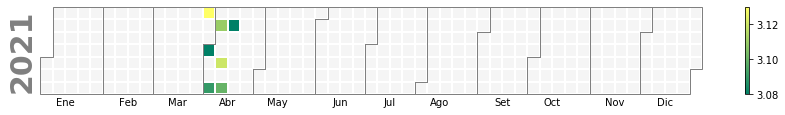

In [4]:
# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python

hoy = datetime.datetime.now()
output_image = "../assets/img/running_2021"
#print(now.strftime("%Y-%m-%d %H:%M:%S"))
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
dias_es = ['L','Ma','Mi','J','V','S','D']
plot = calplot.calplot(distances, yearascending=0, cmap='summer',
                monthlabels=meses, dayticks=False,
#                suptitle="distribución de km, 2021 [actualizado "+hoy.strftime("%Y-%m-%d")+"]"
               )

plt.savefig(output_image+".pdf", transparent=True)
plt.savefig(output_image+".png", transparent=True)
plt.savefig(output_image+".svg", transparent=True)
!convert -trim "../assets/img/running_2021.png" "../assets/img/running_2021.png"